In [1]:
import pandas as pd
import os
import numpy as np
from notebooks.pareto_generator import generate_pareto
from notebooks.pareto_generator import filtra_fronteira_pareto_func

In [2]:
path_solutions = 'solutions/'

solution_df_list = []
resultados_agrupados_dict = dict()
X_var_dict = dict()
N_var_dict = dict()
problem_size_df = None
for idx, sol in enumerate(os.listdir(path_solutions)):
    path_sol = path_solutions + sol + '/'
    
    sol_df = pd.read_csv(path_sol + 'solution.csv')
    sol_df['solution'] = idx
    solution_df_list.append(sol_df)

    X_var = pd.read_csv(path_sol + 'X_var.csv')
    X_var_dict[idx] = X_var

    N_var = pd.read_csv(path_sol + 'N_var.csv')
    N_var_dict[idx] = N_var

    if problem_size_df is None:
        problem_size_df = pd.read_csv(path_sol + 'problem_sets.csv')


solution_df = pd.concat(solution_df_list).reset_index(drop=True)
solution_df.head(3)

,Fobj,Result,solution
0,Obj1,7.341257e+06,0
1,Obj2,4.808000e+01,0
2,Obj1,7.308374e+06,1


In [3]:
df_pivot = (
    solution_df
    .pivot(index='solution', columns='Fobj', values='Result')
    .rename(columns={'Obj1': 'obj1', 'Obj2': 'obj2'})
    .reset_index()
    .sort_values(by='obj1')
    # .drop(columns=['Fobj'])
)
# solutions_drop = pd.Series([24, 28, 13, 7, 6, 3, 16, 11, 2, 18])
df_pivot_new = df_pivot#df_pivot[~df_pivot['solution'].isin(solutions_drop)]

Hipervolume : 471085.84384299006
HipervolumeNormalized : 0.7681158895501701
Delta_metric: 0.8316819287913171 


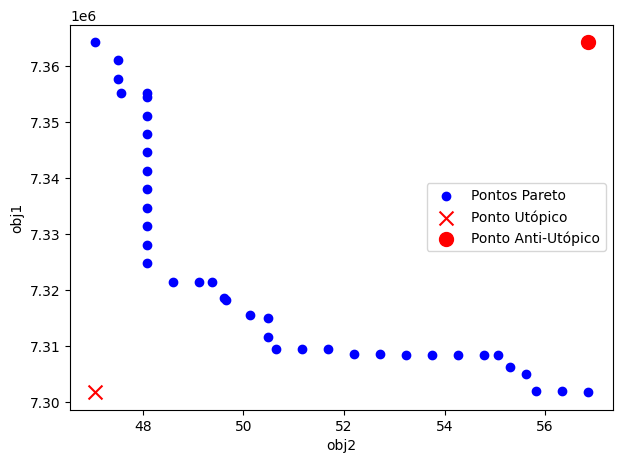

Hipervolume : 471085.84384299
HipervolumeNormalized : 0.76811588955017
Delta_metric: 1.0865733652251555 


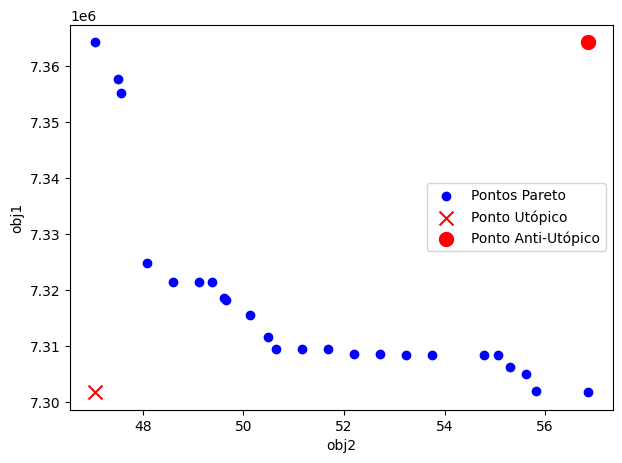

In [4]:
df_pivot = df_pivot_new
generate_pareto(df_pivot_new)
generate_pareto(df_pivot_new, filtra_pareto=True)

In [5]:
# decision_matrix = filtra_fronteira_pareto_func(df_pivot_new)
decision_matrix = df_pivot_new

In [6]:
agg_dict = {'Valor_Var': 'sum'}
decision_matrix['Pacientes por Hospital STDdev'] = (
    decision_matrix
    .apply(
        lambda x: X_var_dict[x['solution']]
        .groupby('Hospital')
        .agg(agg_dict)
        ['Valor_Var']
        .std()
    ,axis=1)
)

decision_matrix['Maximo Paciente em um dia no hospital'] = (
    decision_matrix
    .apply(
        lambda x: N_var_dict[x['solution']]
        .groupby(['Hospital', 'Dia'])
        .agg({'Valor_Var': 'sum'})
        .reset_index()
        .groupby('Hospital')
        .agg({'Valor_Var': 'max'})
        ['Valor_Var']
        .max()
        ,axis=1
    )
)
orig_decision_matrix = decision_matrix.copy()

In [7]:
# Função para normalizar uma coluna
def normalizar_coluna(coluna):
    return (coluna - coluna.min()) / (coluna.max() - coluna.min())

cols_normalize = ['obj1','obj2','Pacientes por Hospital STDdev','Maximo Paciente em um dia no hospital']
decision_matrix_norm = decision_matrix.copy()
for col in cols_normalize:
    decision_matrix_norm[col] = normalizar_coluna(decision_matrix_norm[col])

In [ ]:
decision_matrix_norm

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
10,10,0.000000,1.000000,1.000000,0.809258
3,3,0.002164,0.894789,0.737756,0.809258
9,9,0.002164,0.947423,0.716045,0.809258
14,14,0.052694,0.873592,0.452070,0.732431
27,27,0.072983,0.842154,0.754600,0.690639
33,33,0.105387,0.818544,0.664930,0.712337
21,21,0.106373,0.789519,0.753175,0.701798
20,20,0.106373,0.684250,0.756799,0.701798
1,1,0.106373,0.736885,0.725181,0.701798
31,31,0.106551,0.631616,0.701483,0.696838


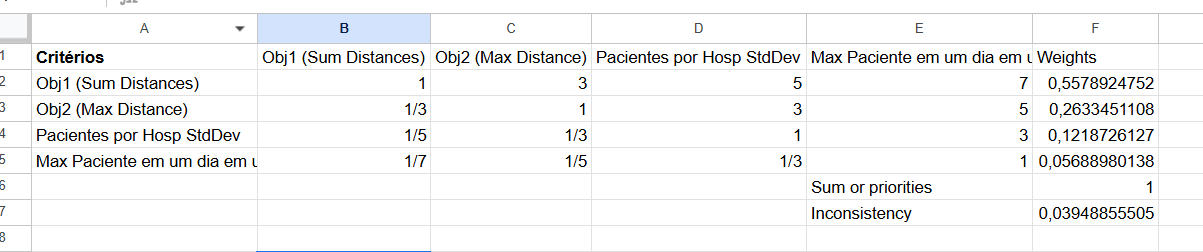

In [9]:
# Weights got from excel 
w_obj1 = 0.5578924752
w_obj2 = 0.2633451108
w_pacientes_por_hosp_stddev = 0.1218726127
w_max_pacientes_day = 0.05688980138

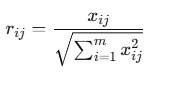

In [10]:
decision_matrix = decision_matrix_norm

In [11]:
# Normalize matrix
obj1_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['obj1']]))
obj2_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['obj2']]))
pacientes_hosp_sttdev_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['Pacientes por Hospital STDdev']]))
max_paciente_factor = np.sqrt(np.sum([np.power(elem, 2) for elem in decision_matrix['Maximo Paciente em um dia no hospital']]))

normalized_matrix = decision_matrix.copy()
normalized_matrix['obj1'] = normalized_matrix['obj1'] / obj1_factor
normalized_matrix['obj2'] = normalized_matrix['obj2'] / obj2_factor
normalized_matrix['Pacientes por Hospital STDdev'] = normalized_matrix['Pacientes por Hospital STDdev'] / pacientes_hosp_sttdev_factor
normalized_matrix['Maximo Paciente em um dia no hospital'] = normalized_matrix['Maximo Paciente em um dia no hospital'] / max_paciente_factor
normalized_matrix.head(3)


Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
10,10,0.000000,0.337728,0.267916,0.191858
3,3,0.000731,0.302195,0.197657,0.191858
9,9,0.000731,0.319971,0.191840,0.191858


In [12]:
# Apply weights
weighted_matrix = normalized_matrix.copy()
weighted_matrix['obj1'] = weighted_matrix['obj1'] * w_obj1
weighted_matrix['obj2'] = weighted_matrix['obj2'] * w_obj2
weighted_matrix['Pacientes por Hospital STDdev'] = weighted_matrix['Pacientes por Hospital STDdev'] * w_pacientes_por_hosp_stddev
weighted_matrix['Maximo Paciente em um dia no hospital'] = weighted_matrix['Maximo Paciente em um dia no hospital'] * w_max_pacientes_day
weighted_matrix.head(3)

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
10,10,0.000000,0.088939,0.032652,0.010915
3,3,0.000408,0.079582,0.024089,0.010915
9,9,0.000408,0.084263,0.023380,0.010915


In [ ]:
# Store best and worst decisions
obj1_best_decision = weighted_matrix['obj1'].min()
obj2_best_decision = weighted_matrix['obj2'].min()
pacientes_hostp_stddev_best_decision = weighted_matrix['Pacientes por Hospital STDdev'].min()
max_paciente_best_decision = weighted_matrix['Maximo Paciente em um dia no hospital'].min()

obj1_worst_decision = weighted_matrix['obj1'].max()
obj2_worst_decision = weighted_matrix['obj2'].max()
pacientes_hostp_stddev_worst_decision = weighted_matrix['Pacientes por Hospital STDdev'].max()
max_paciente_worst_decision = weighted_matrix['Maximo Paciente em um dia no hospital'].max()

# Function to calculate distance of a given solution
def calculate_euclidian_distance_best_decision(obj1, obj2, pacientes_hosp_stddev, max_paciente):
    
    power_obj1 = np.power(obj1 - obj1_best_decision, 2)
    power_obj2 = np.power(obj2 - obj2_best_decision, 2)
    power_hosp_stddev = np.power(pacientes_hosp_stddev - pacientes_hostp_stddev_best_decision, 2)
    power_max_paciente = np.power(max_paciente - max_paciente_best_decision, 2)

    result = np.sqrt( 
        power_obj1 + 
        power_obj2 + 
        power_hosp_stddev + 
        power_max_paciente
    )
    return result

# Function to calculate distance of a given solution
def calculate_euclidian_distance_worst_decision(obj1, obj2, pacientes_hosp_stddev, max_paciente):
    
    power_obj1 = np.power(obj1 - obj1_worst_decision, 2)
    power_obj2 = np.power(obj2 - obj2_worst_decision, 2)
    power_hosp_stddev = np.power(pacientes_hosp_stddev - pacientes_hostp_stddev_worst_decision, 2)
    power_max_paciente = np.power(max_paciente - max_paciente_worst_decision, 2)

    result = np.sqrt( 
        power_obj1 + 
        power_obj2 + 
        power_hosp_stddev + 
        power_max_paciente
    )
    return result


# Calculate distance of each solution to best and worst decisions
weighted_matrix['S+'] = weighted_matrix.apply(
    lambda x: calculate_euclidian_distance_best_decision(
        obj1=x['obj1'], 
        obj2=x['obj2'],
        pacientes_hosp_stddev=x['Pacientes por Hospital STDdev'],
        max_paciente=x['Maximo Paciente em um dia no hospital']
    ), axis=1
)
weighted_matrix['S-'] = weighted_matrix.apply(
    lambda x: calculate_euclidian_distance_worst_decision(
        obj1=x['obj1'], 
        obj2=x['obj2'],
        pacientes_hosp_stddev=x['Pacientes por Hospital STDdev'],
        max_paciente=x['Maximo Paciente em um dia no hospital']
    ), axis=1
)

# Calculate P and define rank of decisions
weighted_matrix['P'] = weighted_matrix['S-'] / (weighted_matrix['S+'] + weighted_matrix['S-'])
weighted_matrix['Rank'] = weighted_matrix['P'].rank(ascending=False)
weighted_matrix

Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital,S+,S-,P,Rank
10,10,0.000000,0.088939,0.032652,0.010915,0.095370,0.188483,0.664017,24.0
3,3,0.000408,0.079582,0.024089,0.010915,0.083862,0.188503,0.692097,16.0
9,9,0.000408,0.084263,0.023380,0.010915,0.088126,0.188362,0.681267,22.0
14,14,0.009931,0.077696,0.014761,0.009879,0.080317,0.179817,0.691248,17.0
27,27,0.013755,0.074900,0.024639,0.009315,0.080580,0.175507,0.685342,20.0
33,33,0.019862,0.072800,0.021711,0.009608,0.079108,0.169772,0.682144,21.0
21,21,0.020048,0.070219,0.024592,0.009465,0.077634,0.169694,0.686110,18.0
20,20,0.020048,0.060856,0.024711,0.009465,0.069323,0.170975,0.711513,12.0
1,1,0.020048,0.065538,0.023678,0.009465,0.073126,0.170320,0.699622,14.0
31,31,0.020081,0.056175,0.022905,0.009399,0.064590,0.171868,0.726844,9.0


In [14]:
# Chosen decision
filter_decision = weighted_matrix['Rank'] == 1
best_decision = weighted_matrix[filter_decision].index[0]
solution = decision_matrix[filter_decision]['solution'].iloc[0]


pareto_best_decision = (
    decision_matrix[filter_decision]['obj1'].iloc[0], 
    decision_matrix[filter_decision]['obj2'].iloc[0], 
)
decision_matrix[filter_decision]

pareto_best_decision = (
    decision_matrix[filter_decision]['obj1'].iloc[0], 
    decision_matrix[filter_decision]['obj2'].iloc[0], 
)
decision_matrix[filter_decision]


Fobj,solution,obj1,obj2,Pacientes por Hospital STDdev,Maximo Paciente em um dia no hospital
15,15,0.124751,0.368442,0.715768,0.734863


In [15]:
filter_solution = orig_decision_matrix['solution'] == solution 

pareto_best_decision_orig = (
    orig_decision_matrix[filter_solution]['obj1'].iloc[0], 
    orig_decision_matrix[filter_solution]['obj2'].iloc[0], 
)

Hipervolume : 471085.84384299006
HipervolumeNormalized : 0.7681158895501701
Delta_metric: 0.8316819287913171 


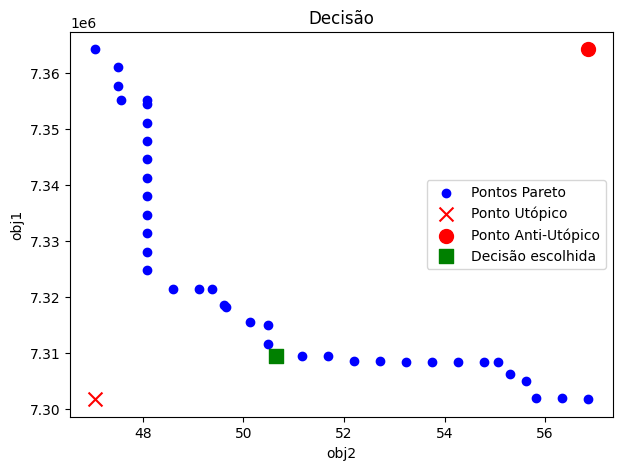

Hipervolume : 471085.84384299
HipervolumeNormalized : 0.76811588955017
Delta_metric: 1.0865733652251555 


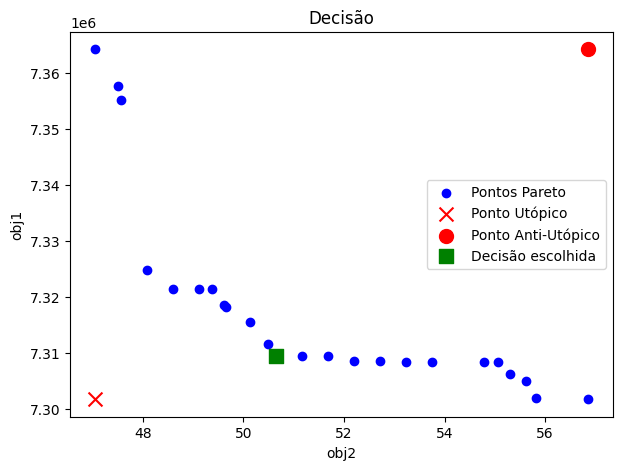

In [16]:
solution

generate_pareto(orig_decision_matrix, title='Decisão', decision=pareto_best_decision_orig)
generate_pareto(orig_decision_matrix, title='Decisão', decision=pareto_best_decision_orig, filtra_pareto=True)

In [17]:
problem_size_df

,Unnamed: 0,H,A,T,R,P
0,0,10,70,13,12,10
